<a href="https://colab.research.google.com/github/LexMainye/Transport-Data/blob/main/Nganya_Income_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import libraries
import pandas as pd
import numpy as np
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings

In [6]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module="ipykernel")

In [7]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Define parameters
dates = pd.date_range(start="2024-11-01", end="2024-11-07")
time_periods = ['Early Morning', 'Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night']
payment_channels = ['Cash', 'M-Pesa', 'Airtel Money','T-Kash']
genders = ['Male', 'Female']

# Maximum transactions per day
max_transactions_per_day = 300

# Maximum transactions per time period and day
max_transactions_per_time_period = 70
max_transactions_per_day = 300

# Generate data
np.random.seed(42)
data = []

for date in dates:
    # Determine the total number of transactions for the current day (200 to 300)
    total_transactions = np.random.randint(200, max_transactions_per_day + 1)

    # Calculate transactions for each time period, ensuring the max for each period is 70
    transactions_per_time_period = {time_period: min(np.random.randint(20, max_transactions_per_time_period + 1), total_transactions) for time_period in time_periods}

    # Adjust to ensure total transactions for the day is correct
    total_assigned_transactions = sum(transactions_per_time_period.values())
    if total_assigned_transactions < total_transactions:
        remaining_transactions = total_transactions - total_assigned_transactions
        for time_period in time_periods:
            if remaining_transactions > 0 and transactions_per_time_period[time_period] < max_transactions_per_time_period:
                transactions_per_time_period[time_period] += 1
                remaining_transactions -= 1

    # Generate transactions for each time period
    for time_period, num_transactions in transactions_per_time_period.items():
        for _ in range(num_transactions):
            payment_channel = np.random.choice(payment_channels)
            gender = np.random.choice(genders)

            # Assign standard fares based on time periods
            if time_period == 'Night':
                fare = 120  # Fixed fare for Nighttime
            elif time_period in ['Morning', 'Evening']:
                fare = np.random.choice([120, 150])  # Peak periods
            else:
                fare = np.random.choice([70, 80, 100])  # Off-peak periods

            # Append transaction
            data.append([date, time_period, payment_channel, fare, gender])

# view the head of the data
columns = ['Date', 'Time Period', 'Payment Channel', 'Amount (KES)', 'Gender']
week_data = pd.DataFrame(data, columns=columns)
week_data.head()


,Date,Time Period,Payment Channel,Amount (KES),Gender
0,2024-11-01,Early Morning,Airtel Money,100,Male
1,2024-11-01,Early Morning,T-Kash,100,Male
2,2024-11-01,Early Morning,M-Pesa,80,Male
3,2024-11-01,Early Morning,T-Kash,80,Female
4,2024-11-01,Early Morning,M-Pesa,70,Female


In [10]:
# Specify the folder path
folder_path = '/content/drive/MyDrive/Nganya Project/Nganya Data'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# File path in the folder (change the extension to .xlsx)
file_path = os.path.join(folder_path, 'nganya.xlsx')

# Save DataFrame to Excel
week_data.to_excel(file_path, index=False)

print(f"Dataset saved to: {file_path}")

Dataset saved to: /content/drive/MyDrive/Nganya Project/Nganya Data/nganya.xlsx


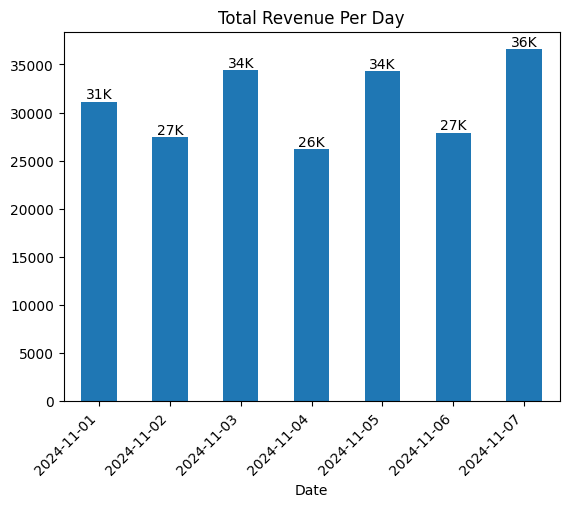

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Total Revenue Per Day.png


In [24]:
# Calculate total revenue per day
week_data['Date'] = pd.to_datetime(week_data['Date'])  # Ensure 'Date' is in datetime format
total_revenue_per_day = week_data.groupby('Date')['Amount (KES)'].sum()
# Get unique dates from the dataset
unique_dates = total_revenue_per_day.index

#Plot the bar graph
ax = total_revenue_per_day.plot(kind='bar', title="Total Revenue Per Day")

# Add numbers on top of bars (abbreviated)
for p in ax.patches:
    height = p.get_height()
    # Abbreviate the number if it's greater than 1000
    if height >= 1000:
        label_text = f'{int(height/1000)}K'
    else:
        label_text = int(height)
    ax.text(p.get_x() + p.get_width() / 2, height + 5, label_text, ha='center', va='bottom')

# Set x-axis ticks and labels using unique dates
ax.set_xticks(range(len(unique_dates)))  # Set tick positions
ax.set_xticklabels(unique_dates.strftime('%Y-%m-%d'), rotation=45, ha='right')  # Set labels


## Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Total Revenue Per Day.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")


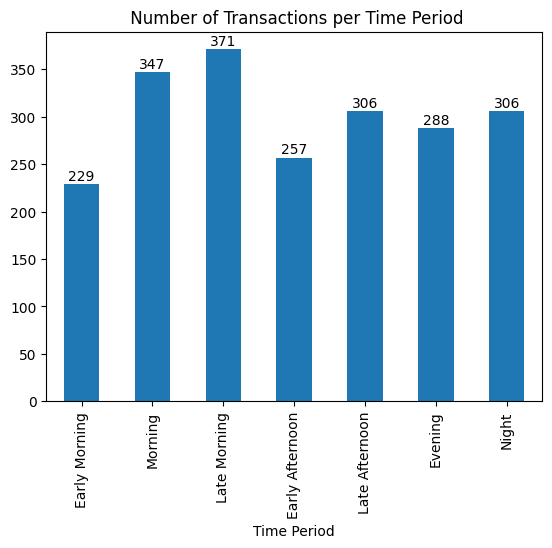

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Number of Transactions per Time Period.png


In [42]:
# Calculate number of transactions per time period
transactions_per_time_period = week_data.groupby('Time Period').size()

# Define the desired order of time periods
time_period_order = ['Early Morning', 'Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night']

# Reindex the data to match the desired order
transactions_per_time_period = transactions_per_time_period.reindex(time_period_order)

# Create the bar chart
ax = transactions_per_time_period.plot(kind='bar', title=" Number of Transactions per Time Period")

# Add numbers on top of bars with reduced distance
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha='center', va='bottom')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Number of Transactions per Time Period.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")

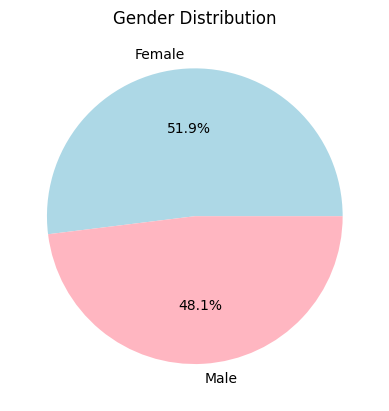

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Gender Distribution.png


In [26]:
# Gender distribution
gender_distribution = week_data['Gender'].value_counts()

# Create pie chart with percentage values and custom colors
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title="Gender Distribution",
                         colors=['lightblue', 'lightpink'])  # Specify colors for Male and Female

# Remove the y-label
plt.ylabel('')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Gender Distribution.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")

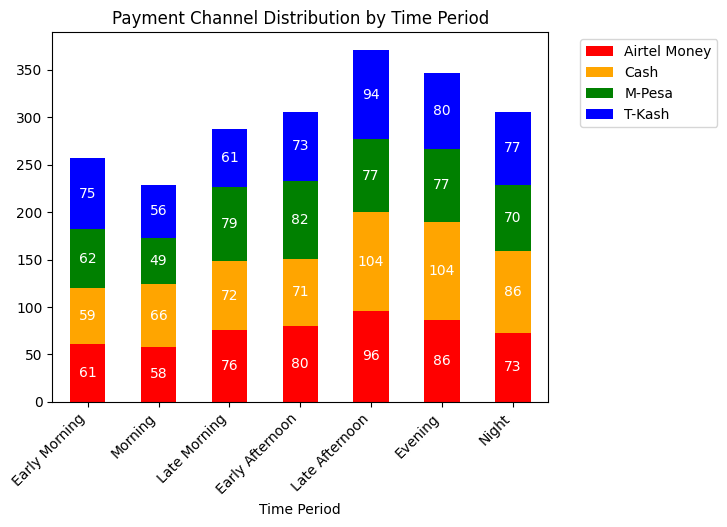

In [39]:
# Payment channel analysis by time period
payment_channel_by_time_period = week_data.groupby(['Time Period', 'Payment Channel']).size().unstack()
# Define the desired order of time periods
time_period_order = ['Early Morning', 'Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night']

# Reindex the data to match the desired order
transactions_per_time_period = transactions_per_time_period.reindex(time_period_order)

# Create the bar chart with custom colors and legend outside
ax = payment_channel_by_time_period.plot(kind='bar', stacked=True, title="Payment Channel Distribution by Time Period", color={'Airtel Money': 'red', 'Cash': 'orange', 'M-Pesa': 'green','T-Kash':'blue'})
# Set the x-axis tick labels to the desired order
ax.set_xticklabels(time_period_order, rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add numbers inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, int(height), ha='center', va='center', color='white')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Payment Channel Distribution by Time Period'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

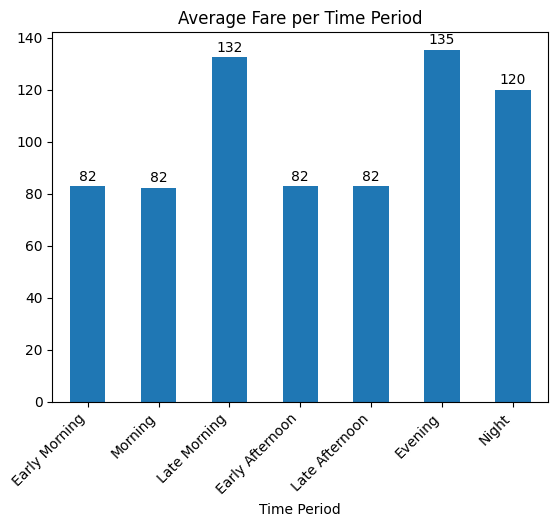

In [40]:
# Calculate average fare per time period
avg_fare_per_time_period = week_data.groupby('Time Period')['Amount (KES)'].mean()

ax = avg_fare_per_time_period.plot(kind='bar', title="Average Fare per Time Period")

# Set the x-axis tick labels to the desired order
ax.set_xticklabels(time_period_order, rotation=45, ha='right')

# Add numbers on top of bars with reduced distance
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha='center', va='bottom')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Average Fare per Time Period'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aggregate data for forecasting
daily_transactions = week_data.groupby('Date').size()

# Check if you have enough data for two full seasonal cycles
if len(daily_transactions) < 2 * 7:  # 2 cycles * 7 days/cycle
    print("Insufficient data for reliable seasonal forecasting. Consider collecting more data.")
    # You can either stop here or proceed with caution, but results may be unreliable
else:
    # Fit a Holt-Winters model
    model = ExponentialSmoothing(daily_transactions, trend='add', seasonal='add', seasonal_periods=7).fit()

    # Forecast the next 7 days
    forecast = model.forecast(steps=7)

    forecast.plot(title="7-Day Transaction Forecast")

Insufficient data for reliable seasonal forecasting. Consider collecting more data.


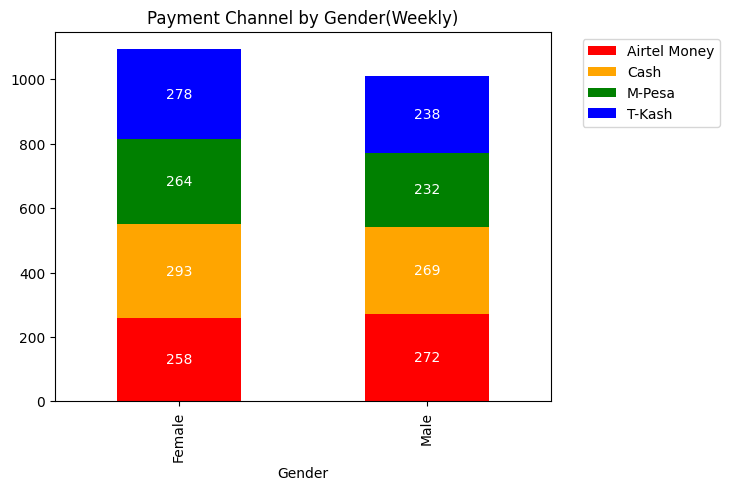

In [30]:
# Calculate payment channel preferences by gender
payment_channel_by_gender = week_data.groupby(['Gender', 'Payment Channel']).size().unstack()

# Plot payment channel preferences by gender with customizations
ax = payment_channel_by_gender.plot(kind='bar', stacked=True, title="Payment Channel by Gender(Weekly)",
                                   color={'Airtel Money': 'red', 'Cash': 'orange', 'M-Pesa': 'green', 'T-Kash': 'blue'})

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add numbers inside the stacked bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, int(height), ha='center', va='center', color='white')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Payment Channel by Gender(Weekly)'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

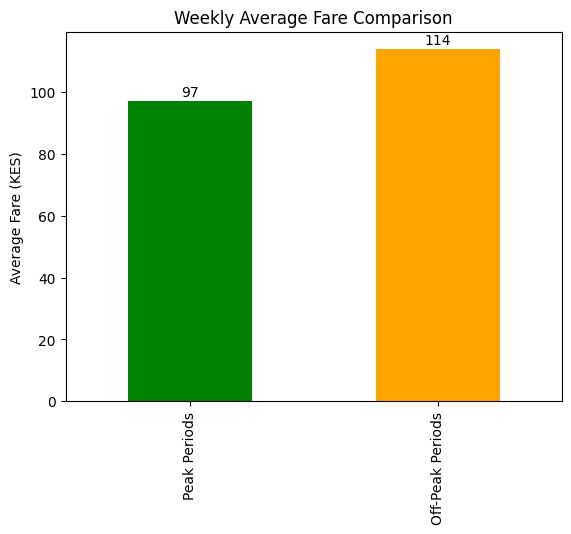

In [32]:

# Compare revenue between fare types for peak and off-peak periods
# Define peak_periods
peak_periods = ['Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon']  # Example peak periods
off_peak_periods = ['Early Morning', 'Evening', 'Night']  # Example off-peak periods

peak_fare_data = week_data[week_data['Time Period'].isin(peak_periods)]
off_peak_fare_data = week_data[week_data['Time Period'].isin(off_peak_periods)]

# Average fare for peak and off-peak periods
peak_avg_fare = peak_fare_data['Amount (KES)'].mean()
off_peak_avg_fare = off_peak_fare_data['Amount (KES)'].mean()

# Create bar plot to compare average fare
fare_comparison = {'Peak Periods': peak_avg_fare, 'Off-Peak Periods': off_peak_avg_fare}
ax = pd.Series(fare_comparison).plot(kind='bar', title="Weekly Average Fare Comparison", color=['green', 'orange'])
plt.ylabel('Average Fare (KES)')

# Add numbers on top of bars, rounded to the nearest integer and lowered
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,  # Reduced vertical offset
            int(round(height)),
            ha='center', va='bottom')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Weekly Average Fare Comparison'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

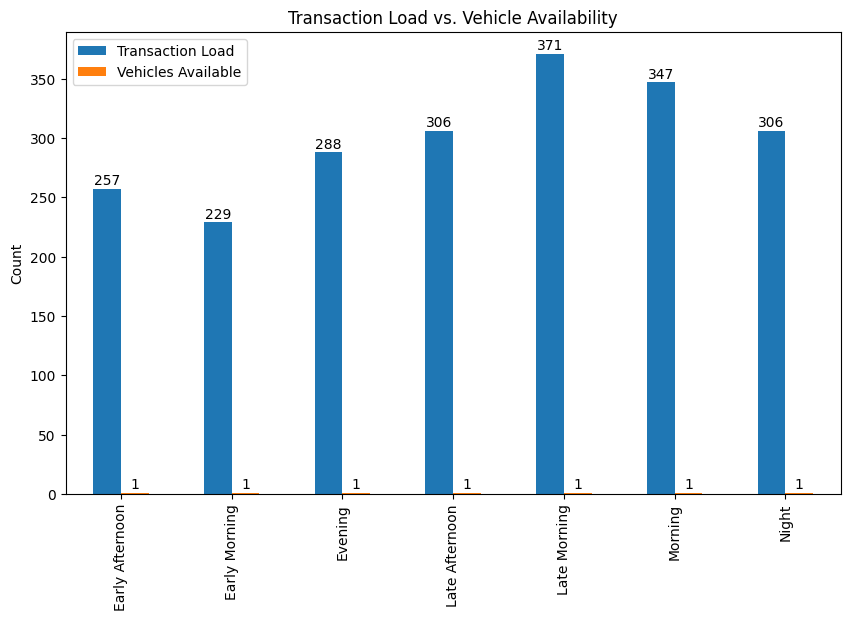

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Transaction Load vs. Vehicle Availability.png


In [34]:
# Assuming you have vehicle data, we can compare transaction load to vehicle availability
# For simplicity, let's assume that each time period corresponds to 1 vehicle being available

vehicle_data = {
    'Early Morning': 1,
    'Morning': 1,
    'Late Morning': 1,
    'Early Afternoon': 1,
    'Late Afternoon': 1,
    'Evening': 1,
    'Night': 1
}

# Calculate transaction load by period
transaction_load_by_period = week_data.groupby('Time Period').size()

# Combine transaction load and vehicle availability into a DataFrame
vehicle_data_df = pd.DataFrame({
    'Transaction Load': transaction_load_by_period,
    'Vehicles Available': pd.Series(vehicle_data)
})

# Plot the data with numbers on bars
ax = vehicle_data_df.plot(kind='bar', title="Transaction Load vs. Vehicle Availability", figsize=(10,6))
plt.ylabel('Count')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha='center', va='bottom')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'
# File name with extension
file_name = 'Transaction Load vs. Vehicle Availability.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")

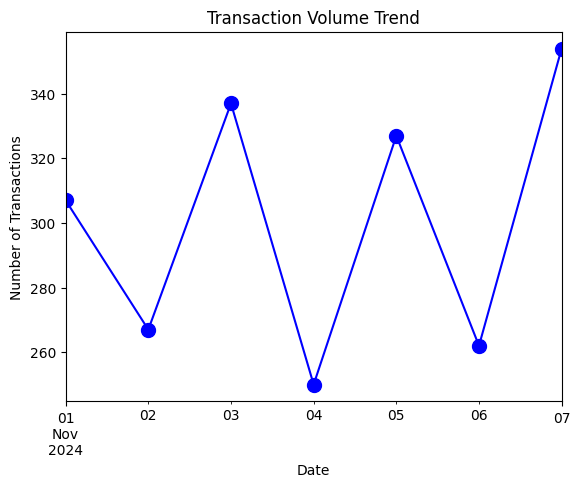

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Transaction Volume Trend.png


In [23]:
# Aggregate data for trend analysis
daily_transactions = week_data.groupby('Date').size()

# Plot the trend of daily transactions
ax = daily_transactions.plot(kind='line', title="Transaction Volume Trend", color='blue', marker='o', markersize=10)  # Increased marker size
plt.ylabel('Number of Transactions')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Transaction Volume Trend.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")


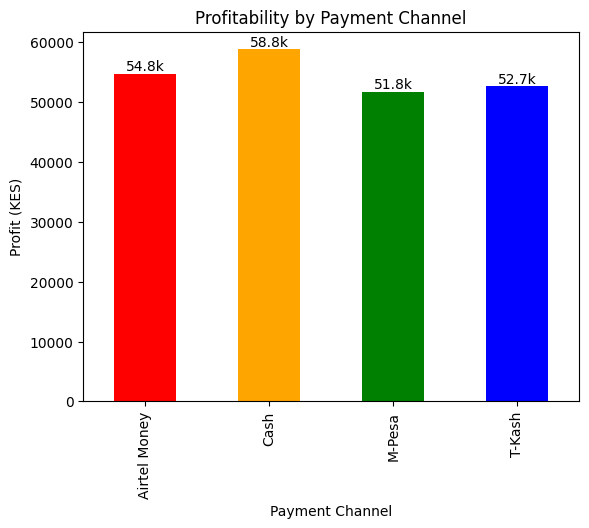

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Profitability by Payment Channel.png


In [35]:
# Profitability (Revenue - Costs) per payment channel
# Assuming you have cost data for mobile payments (e.g., 5% transaction fee for mobile payments)
cost_per_transaction = {'Cash': 0, 'M-Pesa': 0.0, 'Airtel Money': 0.00, 'T-Kash': 0.00}

# Apply the cost per transaction
week_data['Cost'] = week_data['Payment Channel'].map(cost_per_transaction) * week_data['Amount (KES)']
week_data['Profit'] = week_data['Amount (KES)'] - week_data['Cost']

# Profit by payment channel
profit_by_payment_channel = week_data.groupby('Payment Channel')['Profit'].sum()

# Define colors for payment channels
colors = {'Airtel Money': 'red', 'M-Pesa': 'green', 'Cash': 'orange'}

# Plot profitability by payment channel with custom colors
ax = profit_by_payment_channel.plot(kind='bar', title="Profitability by Payment Channel", color=[colors.get(x, 'blue') for x in profit_by_payment_channel.index])
plt.ylabel('Profit (KES)')

# Function to format numbers with abbreviations
def format_number(num):
    if num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}k'
    else:
        return num

# Add abbreviated numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,
            format_number(height),
            ha='center', va='bottom')

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Profitability by Payment Channel.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create a churn label: 1 for return customers, 0 for non-returning
week_data['Churn'] = week_data.groupby('Gender')['Date'].transform(lambda x: x.diff().gt(pd.Timedelta(days=1)).astype(int))

# Select features and target variable
X = week_data[['Amount (KES)', 'Time Period', 'Payment Channel']]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = week_data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict churn on test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421

    accuracy                           1.00       421
   macro avg       1.00      1.00      1.00       421
weighted avg       1.00      1.00      1.00       421



In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data for association rule mining
# Convert categorical variables to one-hot encoding
# Exclude 'Amount (KES)' from one-hot encoding
basket_data = pd.get_dummies(week_data[['Payment Channel', 'Time Period']], drop_first=True)  # Added drop_first=True for better model performance in some cases

# Optional: You can discretize 'Amount (KES)' into bins and then include it
week_data['Amount_Bin'] = pd.qcut(week_data['Amount (KES)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
basket_data = pd.get_dummies(week_data[['Payment Channel', 'Time Period', 'Amount_Bin']], drop_first=True)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)

# Generate association rules from frequent itemsets
# Provide the 'num_itemsets' argument
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1, num_itemsets=frequent_itemsets['itemsets'].apply(len))
# num_itemsets is dynamically calculated using the length of 'itemsets'

# View the generated rules
print(rules)


                                   antecedents  \
0                  (Time Period_Early Morning)   
1                       (Payment Channel_Cash)   
2                   (Time Period_Late Morning)   
3                       (Payment Channel_Cash)   
4                        (Time Period_Morning)   
..                                         ...   
139  (Amount_Bin_High, Payment Channel_T-Kash)   
140       (Amount_Bin_High, Time Period_Night)   
141                   (Payment Channel_T-Kash)   
142                        (Time Period_Night)   
143                          (Amount_Bin_High)   

                                     consequents  antecedent support  \
0                         (Payment Channel_Cash)            0.108840   
1                    (Time Period_Early Morning)            0.267110   
2                         (Payment Channel_Cash)            0.176331   
3                     (Time Period_Late Morning)            0.267110   
4                         (Payment Chan

In [ ]:


# Define the folder path in Google Drive
folder_path = '/content/drive/MyDrive/Matatu Project (1)'  # Replace with your desired path

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file path for the Excel file
file_path = os.path.join(folder_path, 'association_rules.xlsx')

# Export the rules DataFrame to Excel
rules.to_excel(file_path, index=False)

print(f"Association rules exported to: {file_path}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association rules exported to: /content/drive/MyDrive/Matatu Project (1)/association_rules.xlsx


In [ ]:
from sklearn.ensemble import IsolationForest

# Use features like 'Amount (KES)', 'Time Period', and 'Gender' for anomaly detection
X = week_data[['Amount (KES)', 'Time Period', 'Gender']]
X = pd.get_dummies(X, drop_first=True)

# Fit Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)
week_data['Anomaly'] = model.fit_predict(X)

# Visualize anomalies
anomalies = week_data[week_data['Anomaly'] == -1]
print(f"Anomalies detected: {anomalies}")


Anomalies detected: Empty DataFrame
Columns: [Date, Time Period, Payment Channel, Amount (KES), Gender, Cost, Profit, Churn, Amount_Bin, Anomaly]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


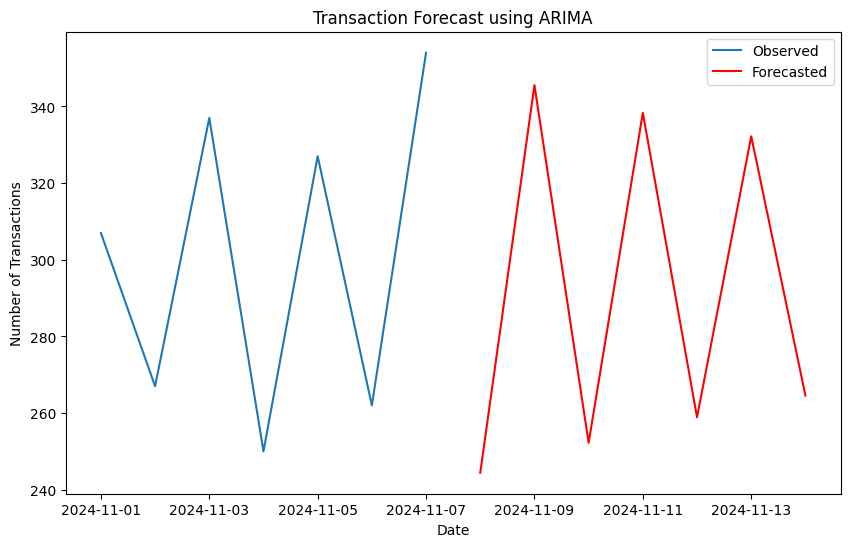

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Transaction Forecast using ARIMA.png


In [36]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Aggregate daily transactions (or fare revenue)
daily_transactions = week_data.groupby('Date').size()

# Fit ARIMA model
model = ARIMA(daily_transactions, order=(1, 1, 1))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

# Get the dates for the forecast
forecast_dates = pd.date_range(start=daily_transactions.index[-1] + pd.DateOffset(days=1), periods=7)

# Plot forecasted values using dates on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions.index, daily_transactions.values, label='Observed')
plt.plot(forecast_dates, forecast, label='Forecasted', color='red')
plt.legend()
plt.title("Transaction Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")


# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Transaction Forecast using ARIMA.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")


R-squared: 0.7838583223604558


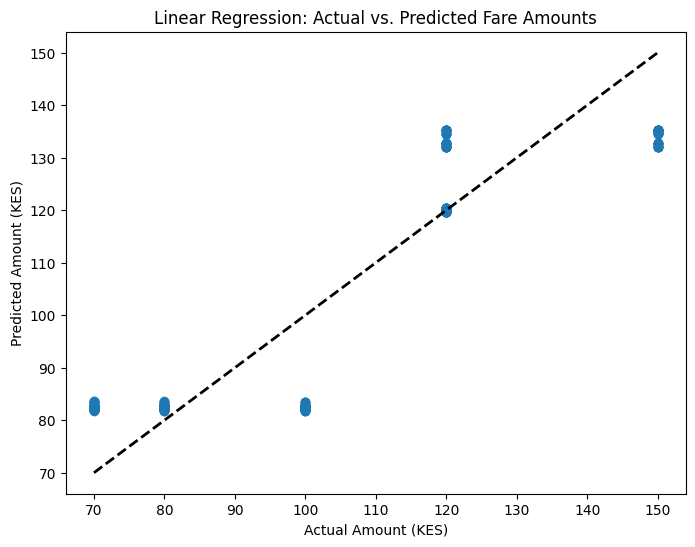

Plot saved to: /content/drive/MyDrive/Nganya Project/Plots/Linear Regression: Actual vs. Predicted Fare Amounts.png


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target variable
X = week_data[['Time Period', 'Gender', 'Payment Channel']]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = week_data['Amount (KES)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"R-squared: {model.score(X_test, y_test)}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.xlabel("Actual Amount (KES)")
plt.ylabel("Predicted Amount (KES)")
plt.title("Linear Regression: Actual vs. Predicted Fare Amounts")

# Define the path to the folder in your Google Drive
google_drive_folder = '/content/drive/MyDrive/Nganya Project/Plots'

# File name with extension
file_name = 'Linear Regression: Actual vs. Predicted Fare Amounts.png'

# Create the full file path
full_file_path = os.path.join(google_drive_folder, file_name)

# Check if the folder exists and create it if necessary
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)

# Save the plot to the Google Drive folder
plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plot saved to: {full_file_path}")


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Select relevant features for clustering (e.g., amount, time period, payment channel)
data_for_clustering = week_data[['Amount (KES)', 'Time Period', 'Payment Channel']]

# 1. Create a LabelEncoder instance
encoder = LabelEncoder()

# 2. Fit and transform the 'Time Period' column to numerical labels
data_for_clustering['Time Period'] = encoder.fit_transform(data_for_clustering['Time Period'])

# Convert categorical variables (payment channel) into numeric values
data_for_clustering = pd.get_dummies(data_for_clustering, columns=['Payment Channel'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
week_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze the clusters
# Include only numeric features in cluster analysis
# Filter out non-numeric columns before calculating the mean
cluster_analysis = week_data.groupby('Cluster')[[
    'Amount (KES)'
] + [
    col for col in week_data.columns
    if 'Payment Channel' in col and week_data[col].dtype != 'object'  # Filter out non-numeric columns
]].mean()

print(cluster_analysis)

         Amount (KES)
Cluster              
0          103.377358
1          104.415323
2          103.432282


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-f563255560f2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Time Period'] = encoder.fit_transform(data_for_clustering['Time Period'])


In [ ]:
# Example Linear Programming for pricing optimization (simplified)
from scipy.optimize import linprog

# Objective function: Maximize revenue (assuming fare rates for peak and off-peak periods)
c = [-120, -100]  # Negative because linprog minimizes, we want to maximize
A = [[1, 1]]  # Total transactions constraint (e.g., no more than 70 transactions per period)
b = [140]  # Max total fare for peak and off-peak periods

# Bounds for each fare rate (in KES)
x0_bounds = (100, 150)
x1_bounds = (80, 100)

# Run Linear Programming to optimize fares
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Print optimal fares
print("Optimal Fare Rates:", res.x)


Optimal Fare Rates: None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
